USD to INR exchange rate: 83.134994
Email sent successfully!


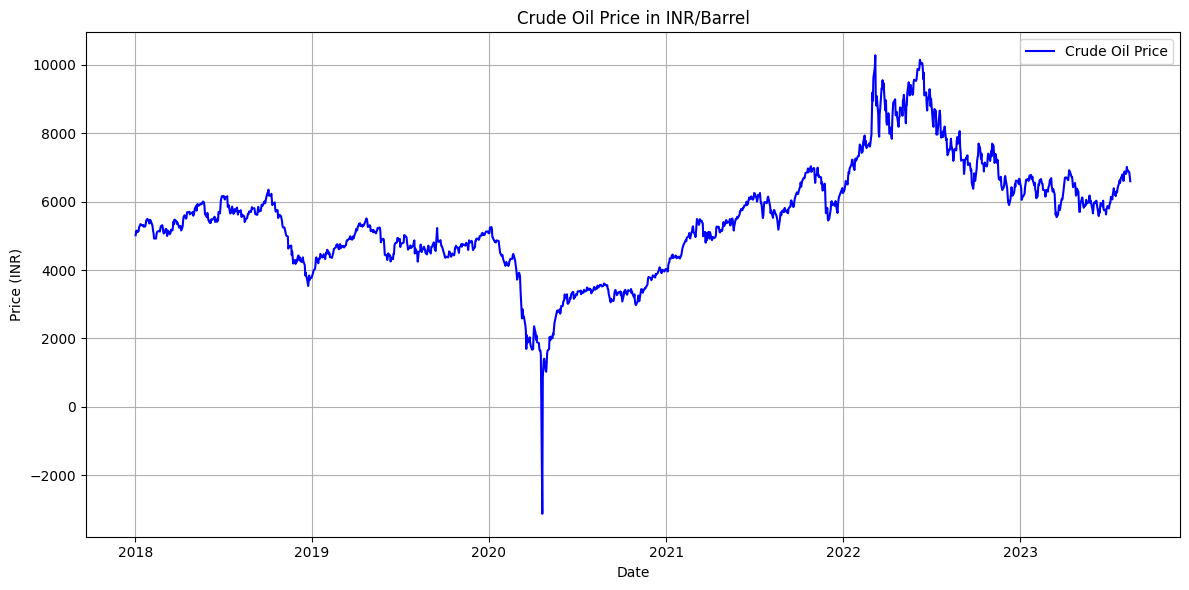

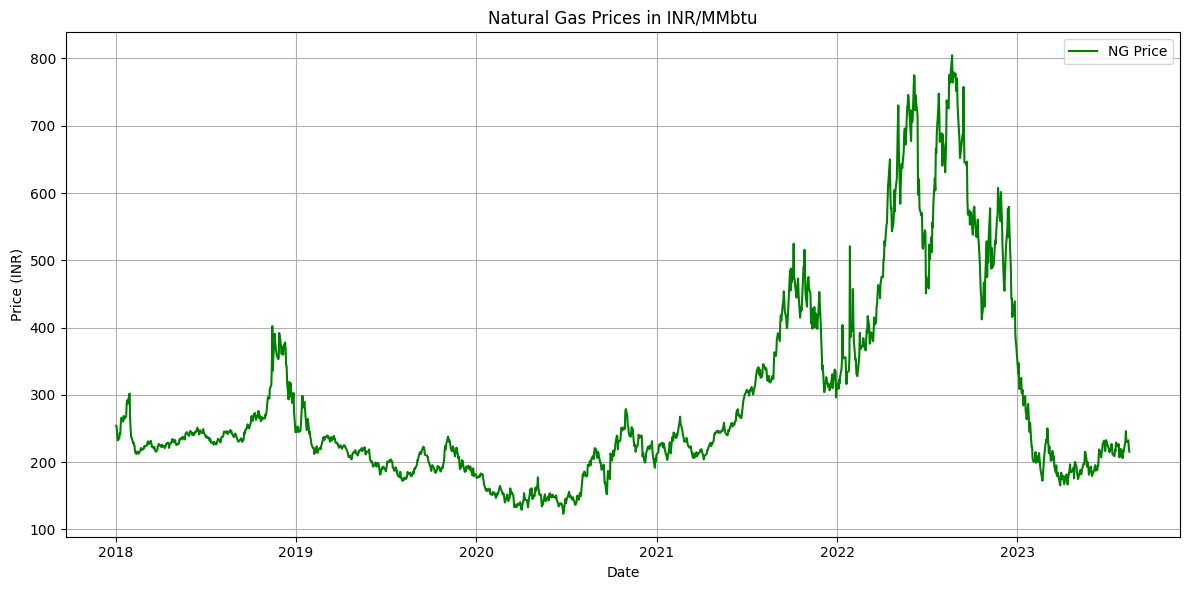

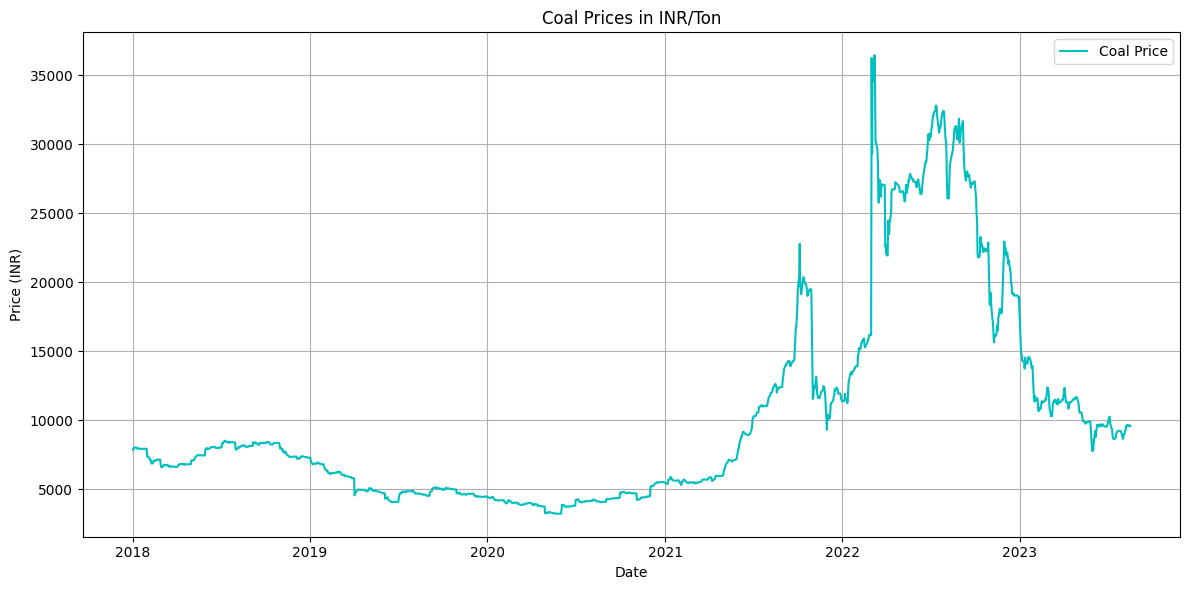

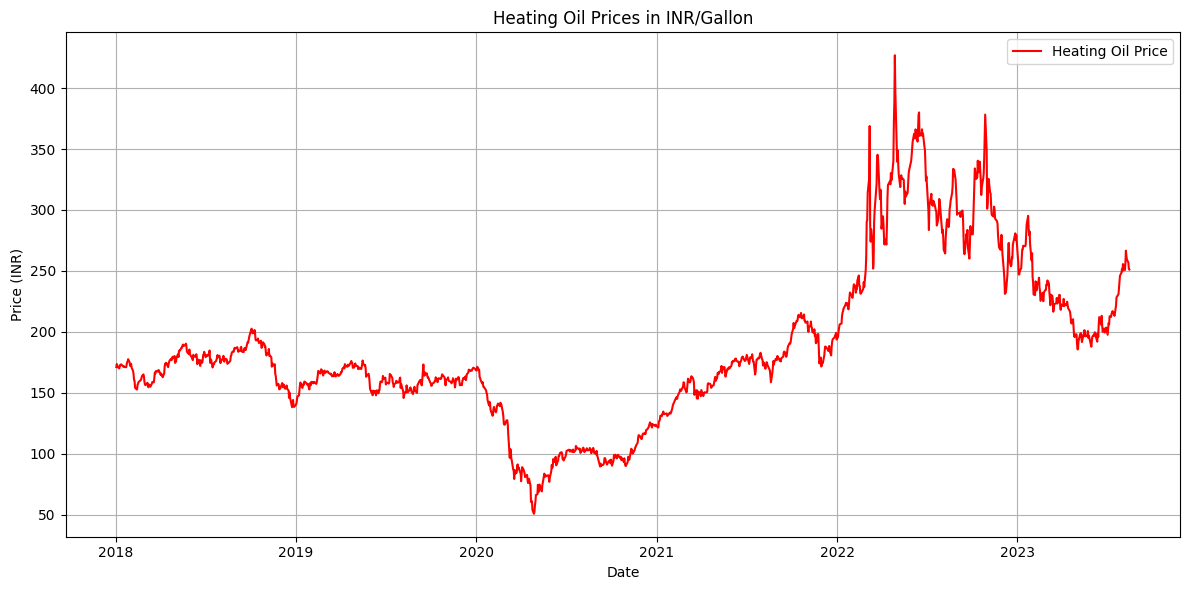

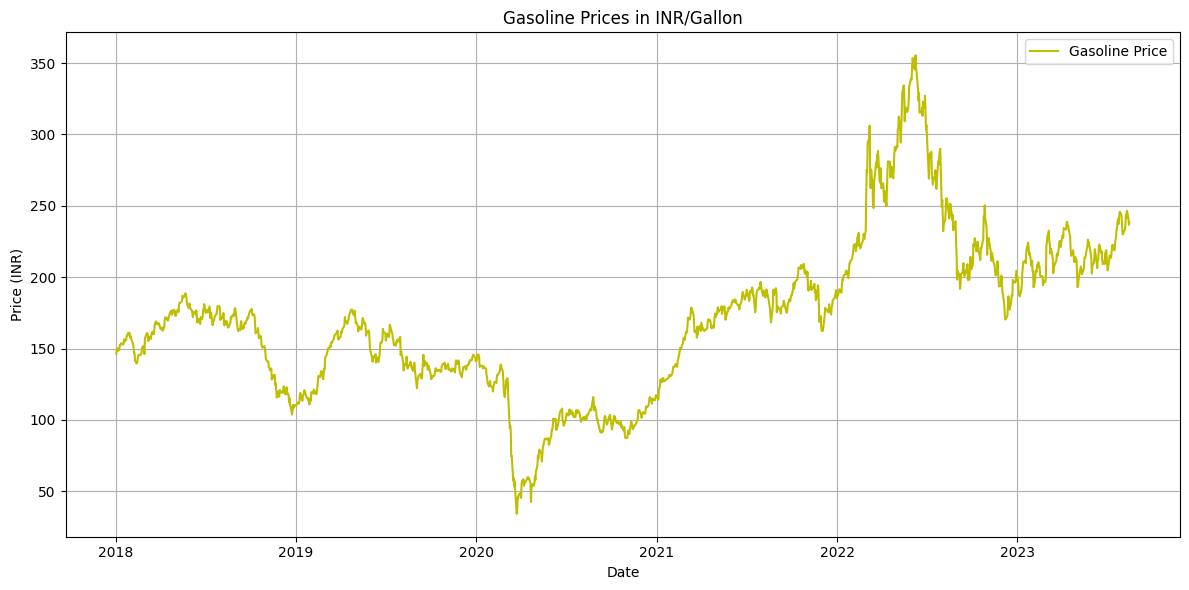

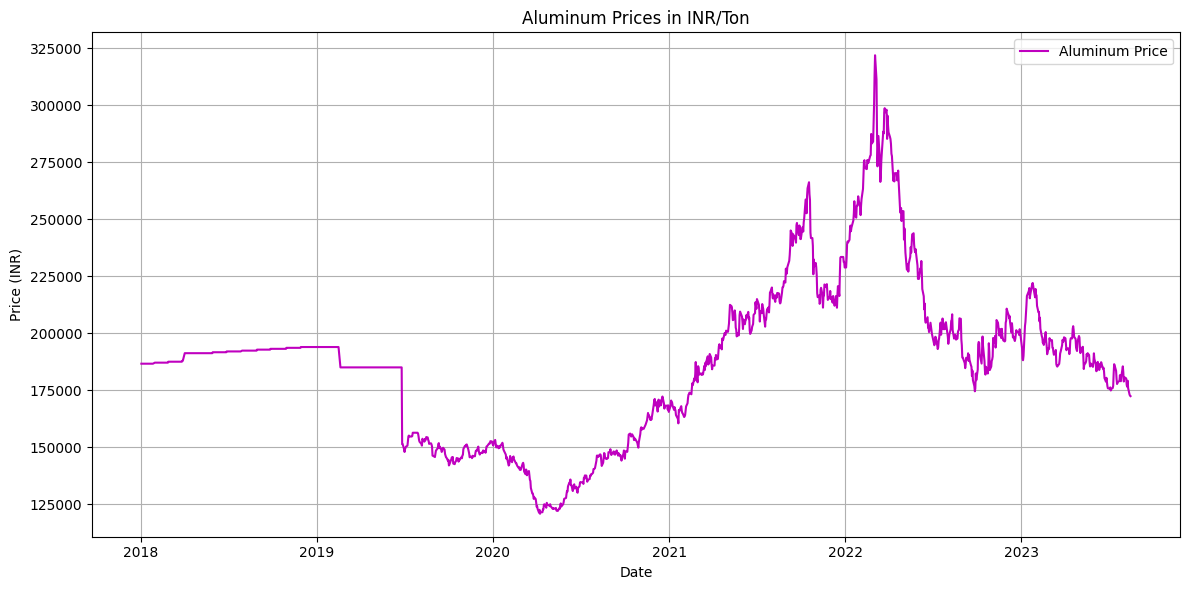

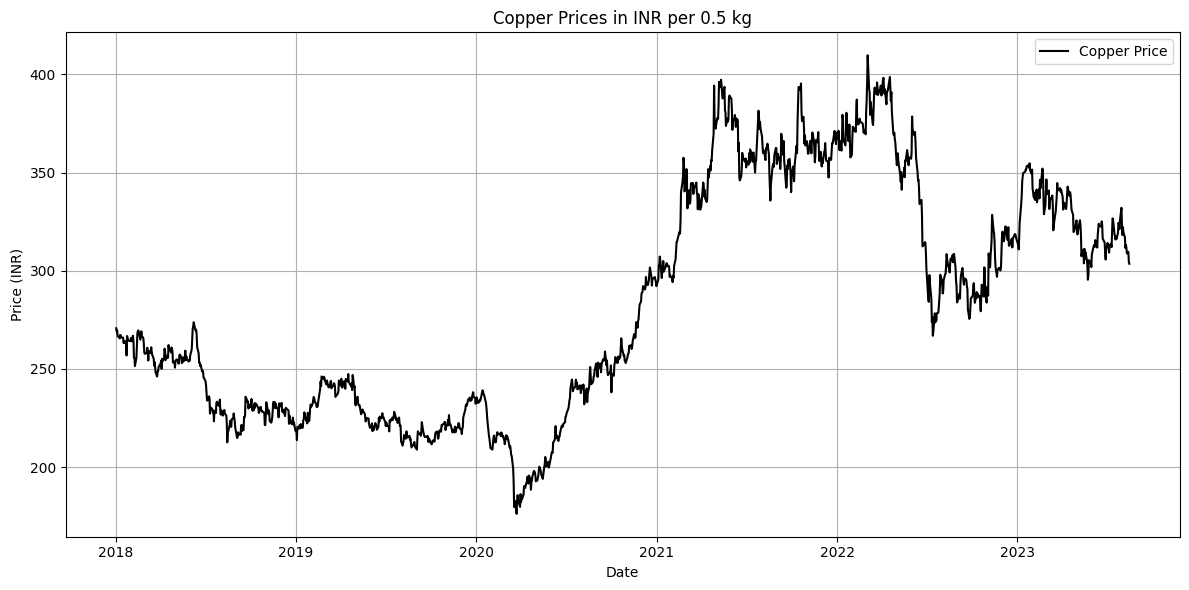

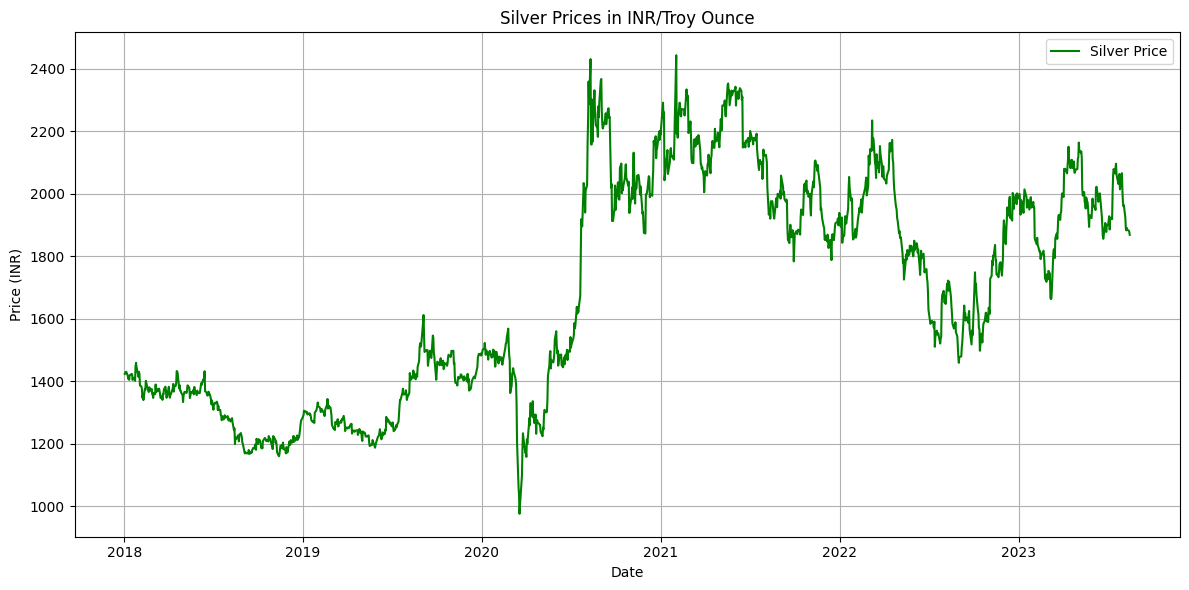

In [1]:
import pandas as pd
import requests
import win32com.client as win32
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import math
from datetime import date, timedelta
from io import BytesIO
import base64
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go

try:
    #Define the date range for the data
    start_date = "2018-01-01"
    end_date = date.today()
    CO = yf.download("CL=F", start=start_date, end=end_date, progress=False)
    NG = yf.download('NG=F', start=start_date, end=end_date, progress=False)
    Coal = yf.download('MTF=F', start=start_date, end=end_date, progress=False)
    HO = yf.download('HO=F', start=start_date, end=end_date, progress=False)
    Gasoline = yf.download('RB=F', start=start_date, end=end_date, progress=False)
    ALU = yf.download('ALI=F', start=start_date, end=end_date, progress=False)
    CP = yf.download('HG=F', start=start_date, end=end_date, progress=False)
    SL = yf.download('SI=F', start=start_date, end=end_date, progress=False)
    
    base_currency = "USD"
    target_currency = "INR"
    api_key = 'eb52e540200946e3b4031bc9e40c27f5'
    url = f'https://api.openexchangerates.org/latest.json?app_id={api_key}'

    response = requests.get(url)
    exchange_rates = response.json()['rates']

    if target_currency in exchange_rates:
        exchange_rate = exchange_rates[target_currency]
        print(f"USD to INR exchange rate: {exchange_rate}")

    c = exchange_rate
    
    # Convert close prices to the target currency
    converted_close = CO["Close"] * c
    converted_close = converted_close.round(2)

    # Step 4: Create a new DataFrame with the converted close prices
    data_converted = pd.DataFrame({"Close_INR": converted_close,"Close_USD": CO["Close"]})
    data_converted.index = CO.index

    # Create interactive plots using Plotly
    fig1 = px.line(data_converted, x=data_converted.index, y="Close_INR", labels={"x": "Date", "Close_INR": "Price (INR)"}, title="Crude Oil Prices in INR/Barrel")
    
    from plotly.subplots import make_subplots
    # Add the USD price as a reference line with a secondary y-axis
    fig1.add_trace(go.Scatter(x=data_converted.index, y=data_converted["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')))

    # Create a subplot with shared x-axis and different y-axes scaling
    fig1 = make_subplots(specs=[[{"secondary_y": True}]])

    # Add the INR price to the first y-axis
    fig1.add_trace(go.Scatter(x=data_converted.index, y=data_converted["Close_INR"], mode='lines', name='Price (INR)', line=dict(color='blue')), secondary_y=False)

    # Add the USD price to the secondary y-axis
    fig1.add_trace(go.Scatter(x=data_converted.index, y=data_converted["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')), secondary_y=True)

    # Update layout to show both y-axes
    fig1.update_layout(
        yaxis=dict(title='Price (INR)', showgrid=False),
        yaxis2=dict(title='Price (USD)', overlaying='y', side='right', showgrid=False),
        xaxis=dict(title='Date'),
    )

    # Save the first plot as an image in memory (BytesIO).
    buffer = BytesIO()
    plt.figure(figsize=(12, 6))
    plt.plot(data_converted.index, data_converted["Close_INR"], label="Crude Oil Price", color="b")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.title("Crude Oil Price in INR/Barrel")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(buffer, format="png")
    buffer.seek(0)

    # Convert the first image to a base64 string.
    img_str = base64.b64encode(buffer.read()).decode()
    buffer.close()
# Convert close prices to the target currency
    converted_close1 = NG["Close"] * c
    converted_close1 = converted_close1.round(2)

    # Step 4: Create a new DataFrame with the converted close prices
    data_converted1 = pd.DataFrame({"Close_INR": converted_close1,"Close_USD": NG["Close"]})
    data_converted1.index = NG.index
    
    fig2 = px.line(data_converted1, x=data_converted1.index, y="Close_INR", labels={"x": "Date", "Close_INR": "Price (INR)"}, title="Natural Gas Prices in INR/MMbtu")

    from plotly.subplots import make_subplots
    # Add the USD price as a reference line with a secondary y-axis
    fig2.add_trace(go.Scatter(x=data_converted1.index, y=data_converted1["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')))

    # Create a subplot with shared x-axis and different y-axes scaling
    fig2 = make_subplots(specs=[[{"secondary_y": True}]])

    # Add the INR price to the first y-axis
    fig2.add_trace(go.Scatter(x=data_converted1.index, y=data_converted1["Close_INR"], mode='lines', name='Price (INR)', line=dict(color='blue')), secondary_y=False)

    # Add the USD price to the secondary y-axis
    fig2.add_trace(go.Scatter(x=data_converted1.index, y=data_converted1["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')), secondary_y=True)

    # Update layout to show both y-axes
    fig2.update_layout(
        yaxis=dict(title='Price (INR)', showgrid=False),
        yaxis2=dict(title='Price (USD)', overlaying='y', side='right', showgrid=False),
        xaxis=dict(title='Date'),
    )
    
    # Save the second plot as an image in memory (BytesIO).
    buffer1 = BytesIO()
    plt.figure(figsize=(12, 6))
    plt.plot(data_converted1.index, data_converted1["Close_INR"], label="NG Price", color="g")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.title("Natural Gas Prices in INR/MMbtu")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(buffer1, format="png")
    buffer1.seek(0)

    # Convert the second image to a base64 string.
    img_str1 = base64.b64encode(buffer1.read()).decode()
    buffer1.close()
    
    converted_close2 =  Coal["Close"] * c
    converted_close2 = converted_close2.round(2)

    # Step 4: Create a new DataFrame with the converted close prices
    data_converted2 = pd.DataFrame({"Close_INR": converted_close2,"Close_USD": Coal["Close"]})
    data_converted2.index =  Coal.index
    
    fig3 = px.line(data_converted2, x=data_converted2.index, y="Close_INR", labels={"x": "Date", "Close_INR": "Price (INR)"}, title="Coal Prices in INR/Ton")

    from plotly.subplots import make_subplots
    # Add the USD price as a reference line with a secondary y-axis
    fig3.add_trace(go.Scatter(x=data_converted2.index, y=data_converted2["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')))

    # Create a subplot with shared x-axis and different y-axes scaling
    fig3 = make_subplots(specs=[[{"secondary_y": True}]])

    # Add the INR price to the first y-axis
    fig3.add_trace(go.Scatter(x=data_converted2.index, y=data_converted2["Close_INR"], mode='lines', name='Price (INR)', line=dict(color='blue')), secondary_y=False)

    # Add the USD price to the secondary y-axis
    fig3.add_trace(go.Scatter(x=data_converted2.index, y=data_converted2["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')), secondary_y=True)

    # Update layout to show both y-axes
    fig3.update_layout(
        yaxis=dict(title='Price (INR)', showgrid=False),
        yaxis2=dict(title='Price (USD)', overlaying='y', side='right', showgrid=False),
        xaxis=dict(title='Date'),
    )
    
    buffer2 = BytesIO()
    plt.figure(figsize=(12, 6))
    plt.plot(data_converted2.index, data_converted2["Close_INR"], label="Coal Price", color="c")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.title("Coal Prices in INR/Ton")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(buffer2, format="png")
    buffer2.seek(0)

    # Convert the image to a base64 string.
    img_str2 = base64.b64encode(buffer2.read()).decode()
    buffer2.close()


    # Convert close prices to the target currency
    converted_close4 = HO["Close"] * c
    converted_close4 = converted_close4.round(2)

    # Step 4: Create a new DataFrame with the converted close prices
    data_converted4 = pd.DataFrame({"Close_INR": converted_close4,"Close_USD": HO["Close"]})
    data_converted4.index = HO.index
        
    fig4 = px.line(data_converted4, x=data_converted4.index, y="Close_INR", labels={"x": "Date", "Close_INR": "Price (INR)"}, title="Heating Oil Prices in INR/Gallon")

    from plotly.subplots import make_subplots
    # Add the USD price as a reference line with a secondary y-axis
    fig4.add_trace(go.Scatter(x=data_converted4.index, y=data_converted4["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')))

    # Create a subplot with shared x-axis and different y-axes scaling
    fig4 = make_subplots(specs=[[{"secondary_y": True}]])

    # Add the INR price to the first y-axis
    fig4.add_trace(go.Scatter(x=data_converted4.index, y=data_converted4["Close_INR"], mode='lines', name='Price (INR)', line=dict(color='blue')), secondary_y=False)

    # Add the USD price to the secondary y-axis
    fig4.add_trace(go.Scatter(x=data_converted4.index, y=data_converted4["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')), secondary_y=True)

    # Update layout to show both y-axes
    fig4.update_layout(
        yaxis=dict(title='Price (INR)', showgrid=False),
        yaxis2=dict(title='Price (USD)', overlaying='y', side='right', showgrid=False),
        xaxis=dict(title='Date'),
    )

    # Save the second plot as an image in memory (BytesIO).
    buffer4 = BytesIO()
    plt.figure(figsize=(12, 6))
    plt.plot(data_converted4.index, data_converted4["Close_INR"], label="Heating Oil Price", color="r")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.title("Heating Oil Prices in INR/Gallon")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(buffer4, format="png")
    buffer4.seek(0)

    # Convert the image to a base64 string.
    img_str4 = base64.b64encode(buffer4.read()).decode()
    buffer4.close()

    # Convert close prices to the target currency
    converted_close5 = Gasoline["Close"] * c
    converted_close5 = converted_close5.round(2)

    # Step 4: Create a new DataFrame with the converted close prices
    data_converted5 = pd.DataFrame({"Close_INR": converted_close5,"Close_USD": Gasoline["Close"]})
    data_converted5.index = Gasoline.index

    fig5 = px.line(data_converted5, x=data_converted5.index, y="Close_INR", labels={"x": "Date", "Close_INR": "Price (INR)"}, title="Gasoline Prices in INR/Gallon")

    from plotly.subplots import make_subplots
    # Add the USD price as a reference line with a secondary y-axis
    fig5.add_trace(go.Scatter(x=data_converted5.index, y=data_converted5["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')))

    # Create a subplot with shared x-axis and different y-axes scaling
    fig5 = make_subplots(specs=[[{"secondary_y": True}]])

    # Add the INR price to the first y-axis
    fig5.add_trace(go.Scatter(x=data_converted5.index, y=data_converted5["Close_INR"], mode='lines', name='Price (INR)', line=dict(color='blue')), secondary_y=False)

    # Add the USD price to the secondary y-axis
    fig5.add_trace(go.Scatter(x=data_converted5.index, y=data_converted5["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')), secondary_y=True)

    # Update layout to show both y-axes
    fig5.update_layout(
        yaxis=dict(title='Price (INR)', showgrid=False),
        yaxis2=dict(title='Price (USD)', overlaying='y', side='right', showgrid=False),
        xaxis=dict(title='Date'),
    )
    
    # Save the fifth plot as an image in memory (BytesIO).
    buffer5 = BytesIO()
    plt.figure(figsize=(12, 6))
    plt.plot(data_converted5.index, data_converted5["Close_INR"], label="Gasoline Price", color="y")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.title("Gasoline Prices in INR/Gallon")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(buffer5, format="png")
    buffer5.seek(0)

    # Convert the image to a base64 string.
    img_str5 = base64.b64encode(buffer5.read()).decode()
    buffer5.close()

    # Convert close prices to the target currency
    converted_close6 = ALU["Close"] * c
    converted_close6 = converted_close6.round(2)

    # Step 4: Create a new DataFrame with the converted close prices
    data_converted6 = pd.DataFrame({"Close_INR": converted_close6,"Close_USD": ALU["Close"]})
    data_converted6.index = ALU.index

    fig6 = px.line(data_converted6, x=data_converted6.index, y="Close_INR", labels={"x": "Date", "Close_INR": "Price (INR)"}, title="Aluminum Prices in INR/Ton")
    
    from plotly.subplots import make_subplots
    # Add the USD price as a reference line with a secondary y-axis
    fig6.add_trace(go.Scatter(x=data_converted6.index, y=data_converted6["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')))

    # Create a subplot with shared x-axis and different y-axes scaling
    fig6 = make_subplots(specs=[[{"secondary_y": True}]])

    # Add the INR price to the first y-axis
    fig6.add_trace(go.Scatter(x=data_converted6.index, y=data_converted6["Close_INR"], mode='lines', name='Price (INR)', line=dict(color='blue')), secondary_y=False)

    # Add the USD price to the secondary y-axis
    fig6.add_trace(go.Scatter(x=data_converted6.index, y=data_converted6["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')), secondary_y=True)

    # Update layout to show both y-axes
    fig6.update_layout(
        yaxis=dict(title='Price (INR)', showgrid=False),
        yaxis2=dict(title='Price (USD)', overlaying='y', side='right', showgrid=False),
        xaxis=dict(title='Date'),
    )
    
    # Save the sixth plot as an image in memory (BytesIO).
    buffer6 = BytesIO()
    plt.figure(figsize=(12, 6))
    plt.plot(data_converted6.index, data_converted6["Close_INR"], label="Aluminum Price", color="m")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.title("Aluminum Prices in INR/Ton")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(buffer6, format="png")
    buffer6.seek(0)

    # Convert the image to a base64 string.
    img_str6 = base64.b64encode(buffer6.read()).decode()
    buffer6.close()

    # Convert close prices to the target currency
    converted_close7 = CP["Close"] * c
    converted_close7 = converted_close7.round(2)

    # Step 4: Create a new DataFrame with the converted close prices
    data_converted7 = pd.DataFrame({"Close_INR": converted_close7,"Close_USD": CP["Close"]})
    data_converted7.index = CP.index
    
    fig7 = px.line(data_converted7, x=data_converted7.index, y="Close_INR", labels={"x": "Date", "Close_INR": "Price (INR)"}, title="Copper Prices in INR per 0.5 kg")

    from plotly.subplots import make_subplots
    # Add the USD price as a reference line with a secondary y-axis
    fig7.add_trace(go.Scatter(x=data_converted7.index, y=data_converted7["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')))

    # Create a subplot with shared x-axis and different y-axes scaling
    fig7 = make_subplots(specs=[[{"secondary_y": True}]])

    # Add the INR price to the first y-axis
    fig7.add_trace(go.Scatter(x=data_converted7.index, y=data_converted7["Close_INR"], mode='lines', name='Price (INR)', line=dict(color='blue')), secondary_y=False)

    # Add the USD price to the secondary y-axis
    fig7.add_trace(go.Scatter(x=data_converted7.index, y=data_converted7["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')), secondary_y=True)

    # Update layout to show both y-axes
    fig7.update_layout(
        yaxis=dict(title='Price (INR)', showgrid=False),
        yaxis2=dict(title='Price (USD)', overlaying='y', side='right', showgrid=False),
        xaxis=dict(title='Date'),
    )
    
    # Save the seventh plot as an image in memory (BytesIO).
    buffer7 = BytesIO()
    plt.figure(figsize=(12, 6))
    plt.plot(data_converted7.index, data_converted7["Close_INR"], label="Copper Price", color="k")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.title("Copper Prices in INR per 0.5 kg")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(buffer7, format="png")
    buffer7.seek(0)

    # Convert the image to a base64 string.
    img_str7 = base64.b64encode(buffer7.read()).decode()
    buffer7.close()

    # Convert close prices to the target currency
    converted_close8 = SL["Close"] * c
    converted_close8 = converted_close8.round(2)

    # Step 4: Create a new DataFrame with the converted close prices
    data_converted8 = pd.DataFrame({"Close_INR": converted_close8,"Close_USD": SL["Close"]})
    data_converted8.index = SL.index
    
    fig8 = px.line(data_converted8, x=data_converted8.index, y="Close_INR", labels={"x": "Date", "Close_INR": "Price (INR)"}, title="Silver Prices in INR/Troy Ounce")

    from plotly.subplots import make_subplots
    # Add the USD price as a reference line with a secondary y-axis
    fig8.add_trace(go.Scatter(x=data_converted8.index, y=data_converted8["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')))

    # Create a subplot with shared x-axis and different y-axes scaling
    fig8 = make_subplots(specs=[[{"secondary_y": True}]])

    # Add the INR price to the first y-axis
    fig8.add_trace(go.Scatter(x=data_converted8.index, y=data_converted8["Close_INR"], mode='lines', name='Price (INR)', line=dict(color='blue')), secondary_y=False)

    # Add the USD price to the secondary y-axis
    fig8.add_trace(go.Scatter(x=data_converted8.index, y=data_converted8["Close_USD"], mode='lines', name='Price (USD)', line=dict(color='red')), secondary_y=True)

    # Update layout to show both y-axes
    fig8.update_layout(
        yaxis=dict(title='Price (INR)', showgrid=False),
        yaxis2=dict(title='Price (USD)', overlaying='y', side='right', showgrid=False),
        xaxis=dict(title='Date'),
    )
    
    # Save the eighth plot as an image in memory (BytesIO).
    buffer8 = BytesIO()
    plt.figure(figsize=(12, 6))
    plt.plot(data_converted8.index, data_converted8["Close_INR"], label="Silver Price", color="g")
    plt.xlabel("Date")
    plt.ylabel("Price (INR)")
    plt.title("Silver Prices in INR/Troy Ounce")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(buffer8, format="png")
    buffer8.seek(0)

    # Convert the image to a base64 string.
    img_str8 = base64.b64encode(buffer8.read()).decode()
    buffer8.close()

    
    
    # Saving the interactive plot on Plotly Chart Studio 
    username = "anand.du.or.22"  
    api_key = "OyFE8ZxEZSgQWu0VbBhb"  
    
    # Setting up the authentication
    py.sign_in(username, api_key)

    # Uploading the plot to Chart Studio and getting the URL
    url_fig1 = py.plot(fig1, auto_open=False)
    url_fig2 = py.plot(fig2, auto_open=False)
    url_fig3 = py.plot(fig3, auto_open=False)
    url_fig4 = py.plot(fig4, auto_open=False)
    url_fig5 = py.plot(fig5, auto_open=False)
    url_fig6 = py.plot(fig6, auto_open=False)
    url_fig7 = py.plot(fig7, auto_open=False)
    url_fig8 = py.plot(fig8, auto_open=False)

    # Create the email body
    email_body = "Dear Sir, Please find real-time commodity price trend upto last 5 year.<br><br>"
    email_body = "Click the links to view interactive plot.<br><br>"

    # Add the second plot content to the email body
    email_body += f"<br><br><h2>Natural Gas Price Plot</h2>"
    email_body += f"<img src='data:image/png;base64,{img_str1}' alt='NG Price Plot'>"
    # Adding links to the hosted plots in the email body
    email_body += f"<a href='{url_fig2}' target='_blank'>Click here to view the Natural Gas Price Plot</a>"
    
    # Add the second plot content to the email body
    email_body += f"<br><br><h2>Coal Price Plot</h2>"
    email_body += f"<img src='data:image/png;base64,{img_str2}' alt='Coal Price Plot'>"
    email_body += f"<a href='{url_fig3}' target='_blank'>Click here to view the Coal Price Plot</a>"
    
    
    email_body += f"<br><br><h2>Heating Oil Price Plot</h2>"
    email_body += f"<img src='data:image/png;base64,{img_str4}' alt='Heating Oil Price Plot'>"
    email_body += f"<a href='{url_fig4}' target='_blank'>Click here to view the Heating Oil Price Plot</a>"
    
    # Add the first plot content to the email body
    email_body += f"<br><br><h2>Crude Oil Price Plot</h2>"
    email_body += f"<img src='data:image/png;base64,{img_str}' alt='Crude Oil Price Plot'>"
    # Adding links to the hosted plots in the email body
    email_body += f"<a href='{url_fig1}' target='_blank'>Click here to view the Crude Oil Price Plot</a>"
    
    email_body += f"<br><br><h2>Gasoline Price Plot</h2>"
    email_body += f"<img src='data:image/png;base64,{img_str5}' alt='Gasoline Price Plot'>"
    email_body += f"<a href='{url_fig5}' target='_blank'>Click here to view the Gasoline Price Plot</a>"
    
    email_body += f"<br><br><h2>Aluminium Price Plot</h2>"
    email_body += f"<img src='data:image/png;base64,{img_str6}' alt='Aluminium Price Plot'>"
    email_body += f"<a href='{url_fig6}' target='_blank'>Click here to view the Aluminium Price Plot</a>"
    
    email_body += f"<br><br><h2>Copper Price Plot</h2>"
    email_body += f"<img src='data:image/png;base64,{img_str7}' alt='Copper Price Plot'>"
    email_body += f"<a href='{url_fig7}' target='_blank'>Click here to view the Copper Price Plot</a>"
    
    email_body += f"<br><br><h2>Silver Price Plot</h2>"
    email_body += f"<img src='data:image/png;base64,{img_str8}' alt='Silver Price Plot'>"
    email_body += f"<a href='{url_fig8}' target='_blank'>Click here to view the Silver Price Plot</a>"
    
    # Create Outlook application object
    outlook = win32.Dispatch("Outlook.Application")

    # Create a new mail item
    mail = outlook.CreateItem(0)  # 0 represents a MailItem

    # Set the properties of the mail item
    mail.Subject = "Real-time commodity price"

    # Add the content to the email body
    mail.HTMLBody = email_body

    recipients = ["vikas.redhu@somanyceramics.com","sandeep.chopra@somanyceramics.com","sachin.jain@somanyceramics.com","sailesh.kedawat@somanyceramics.com"] # Add the email addresses of recipients here

    mail.To = ";".join(recipients)

    # Send the mail
    mail.Send()

    print("Email sent successfully!")

except Exception as e:
    print(f"An error occurred: {e}")
